<a href="https://colab.research.google.com/github/jacksonns/TensorFlow_Practice/blob/main/02_tf_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TensorFlow Classification

In [1]:
import tensorflow as tf
print(tf.__version__)

2.8.0


#### 0. Familiarize with Classification

In [2]:
from sklearn.datasets import make_circles

n_samples = 1000

x,y = make_circles(n_samples, noise = 0.03, random_state = 42)

Visualizing the data with pandas and pyplot

In [3]:
import pandas as pd

circles = pd.DataFrame({'x0':x[:,0], 'x1':x[:, 1], 'label': y})
circles.head()

,x0,x1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [4]:
# See what kind of label we are dealing with (Binary Classification)
circles.label.value_counts()

1    500
0    500
Name: label, dtype: int64

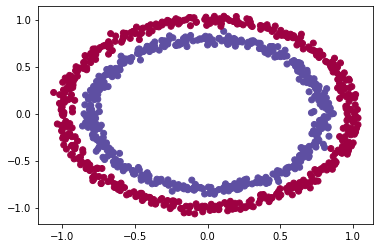

In [5]:
from matplotlib import pyplot as plt

# using y to define the color of the point and color map Spectral
plt.scatter(x[:,0], x[:,1], c = y, cmap=plt.cm.Spectral)  

Ploting decision boundary function

In [6]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html
  
  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(y_pred).reshape(xx.shape)
  
  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.Spectral, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

Creating models

In [7]:
# This one has low accuracy (about 50%)
tf.random.set_seed(42)

model = tf.keras.Sequential([
  tf.keras.layers.Dense(100, input_shape=(None, 1)),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

model.compile(loss = tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ['accuracy'])

history = model.fit (x, y, epochs = 100, verbose = 0)
model.evaluate(x,y)

32/32 [==============================] - 1s 4ms/step - loss: 0.6939 - accuracy: 0.5000


[0.6939496994018555, 0.5]

doing multiclass classification...


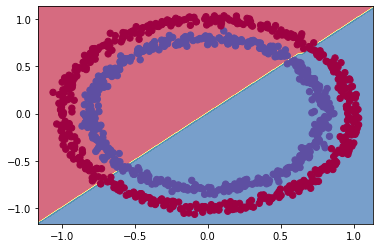

In [8]:
plot_decision_boundary(model, x, y)

In [9]:
tf.random.set_seed(42)

model2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation = tf.keras.activations.relu),   # Adding activation
  tf.keras.layers.Dense(10, activation = tf.keras.activations.relu),
  tf.keras.layers.Dense(1, activation = tf.keras.activations.relu),
])

model2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy'])

history = model2.fit (x, y, epochs = 100, verbose = 0)

In [10]:
model2.evaluate(x,y)

32/32 [==============================] - 0s 3ms/step - loss: 0.0064 - accuracy: 1.0000


[0.006385345943272114, 1.0]

doing binary classifcation...


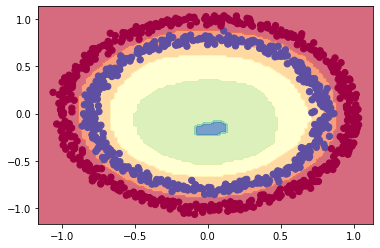

In [11]:
plot_decision_boundary(model2, x, y)

In [12]:
tf.random.set_seed(42)

model3 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation = tf.keras.activations.relu),
  tf.keras.layers.Dense(4, activation = tf.keras.activations.relu),
  tf.keras.layers.Dense(1, activation = tf.keras.activations.sigmoid),   # sigmoid on output layer can improve results with less neurons
])

model3.compile(loss = tf.keras.losses.binary_crossentropy,
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ['accuracy'])

history = model3.fit (x, y, epochs = 100, verbose = 0)
model3.evaluate (x, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.2948 - accuracy: 0.9910


[0.2948004901409149, 0.9909999966621399]

doing binary classifcation...


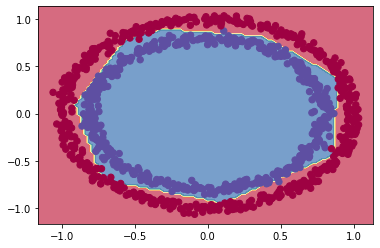

In [13]:
plot_decision_boundary(model3, x, y)

#### 1. Play with neural networks in the [TensorFlow Playground](https://playground.tensorflow.org/) for 10-minutes. Especially try different values of the learning, what happens when you decrease it? What happens when you increase it?

When decreased to 1e-5, the training loss keep on 0.5 for too long. When set to 1, starts an interesting oscillatory pattern and if it's set to 10, the model doesn't learn anything, because it goes too fast. Lower learning rates, just like 0.001, can converge to lower training loss, but need more epochs. The best value found for this example was 0.1, which can converge to a good accuracy with few epochs. An interesting fact is that if we increase to 0.3, we get another oscillatory pattern.

#### 2. Replicate the model pictured in the [TensorFlow Playground diagram](https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.001&regularizationRate=0&noise=0&networkShape=6,6,6,6,6&seed=0.51287&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false&regularization_hide=true&discretize_hide=true&regularizationRate_hide=true&percTrainData_hide=true&dataset_hide=true&problem_hide=true&noise_hide=true&batchSize_hide=true) below using TensorFlow code. Compile it using the Adam optimizer, binary crossentropy loss and accuracy metric. Once it's compiled check a summary of the model.
![tensorflow playground example neural network](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/02-tensorflow-playground-replication-exercise.png)
*Try this network out for yourself on the [TensorFlow Playground website](https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.001&regularizationRate=0&noise=0&networkShape=6,6,6,6,6&seed=0.51287&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false&regularization_hide=true&discretize_hide=true&regularizationRate_hide=true&percTrainData_hide=true&dataset_hide=true&problem_hide=true&noise_hide=true&batchSize_hide=true). Hint: there are 5 hidden layers but the output layer isn't pictured, you'll have to decide what the output layer should be based on the input data.*

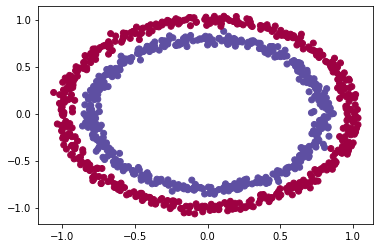

In [14]:
# Using the same dataset as above (Exercise 0.)

plt.scatter(x[:,0], x[:,1], c = y, cmap=plt.cm.Spectral)  

In [15]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(6, activation = "relu"),
  tf.keras.layers.Dense(6, activation = "relu"),
  tf.keras.layers.Dense(6, activation = "relu"),
  tf.keras.layers.Dense(6, activation = "relu"),
  tf.keras.layers.Dense(6, activation = "relu"),
  tf.keras.layers.Dense(1, activation = "sigmoid"),                     
])

model_2.compile(loss = "binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

model_2.fit(x, y, epochs = 100, verbose = 0)

In [16]:
model_2.evaluate(x, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.0011 - accuracy: 1.0000


[0.001086818054318428, 1.0]

In [17]:
model_2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 6)                 18        
                                                                 
 dense_10 (Dense)            (None, 6)                 42        
                                                                 
 dense_11 (Dense)            (None, 6)                 42        
                                                                 
 dense_12 (Dense)            (None, 6)                 42        
                                                                 
 dense_13 (Dense)            (None, 6)                 42        
                                                                 
 dense_14 (Dense)            (None, 1)                 7         
                                                                 
Total params: 193
Trainable params: 193
Non-trainable 

#### 3. Create a classification dataset using Scikit-Learn's [`make_moons()`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) function, visualize it and then build a model to fit it at over 85% accuracy.

In [18]:
from sklearn.datasets import make_moons

n_samples = 1000

x, y = make_moons(n_samples, noise = 0.05)

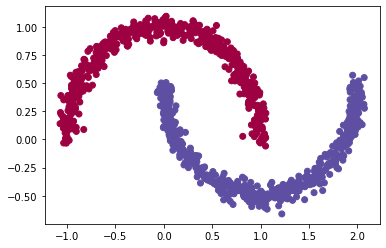

In [19]:
plt.scatter(x[:,0], x[:,1], c = y, cmap = plt.cm.Spectral)

First try (89% accuracy)

In [20]:
tf.random.set_seed(42)

model1 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation = "relu"),  # or tf.keras.activations.relu
  tf.keras.layers.Dense(1, activation = "relu")
])

model1.compile(loss = "binary_crossentropy",  # or tf.keras.losses.BinaryCrossentropy()
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ["accuracy"])

model1.fit(x, y, epochs = 100)

Epoch 1/100
32/32 [==============================] - 0s 1ms/step - loss: 1.2188 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 1ms/step - loss: 0.9746 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 1ms/step - loss: 0.9101 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 1ms/step - loss: 0.8591 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.8235 - accuracy: 0.5010
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7801 - accuracy: 0.5050
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7462 - accuracy: 0.5110
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.7155 - accuracy: 0.5280
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6863 - accuracy: 0.5780
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6580 - accuracy: 0.6180
Epoch 11/

In [21]:
model1.evaluate(x, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.0940 - accuracy: 0.9560


[0.09402841329574585, 0.9559999704360962]

doing binary classifcation...


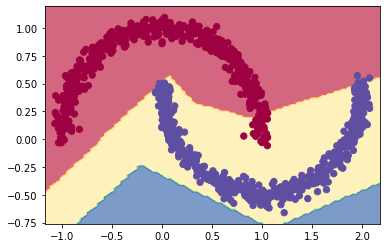

In [22]:
plot_decision_boundary(model1, x, y)

Second try (97,9% accuracy) after adding 2 hidden layers with 6 neurons each and sigmoid activation function in the output layer

In [23]:
tf.random.set_seed(42)

model2 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation = "relu"),  # or tf.keras.activations.relu
  tf.keras.layers.Dense(6, activation = "relu"),
  tf.keras.layers.Dense(6, activation = "relu"),
  tf.keras.layers.Dense(1, activation = "sigmoid")
])

model2.compile(loss = "binary_crossentropy",  # or tf.keras.losses.BinaryCrossentropy()
               optimizer = tf.keras.optimizers.Adam(),
               metrics = ["accuracy"])

model2.fit(x, y, epochs = 100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.6676 - accuracy: 0.7070
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6336 - accuracy: 0.8650
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.5860 - accuracy: 0.8770
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.5215 - accuracy: 0.8800
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.4478 - accuracy: 0.8790
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3789 - accuracy: 0.8760
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3298 - accuracy: 0.8740
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.3011 - accuracy: 0.8770
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2846 - accuracy: 0.8780
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2747 - accuracy: 0.8810
Epoch 11/

doing binary classifcation...


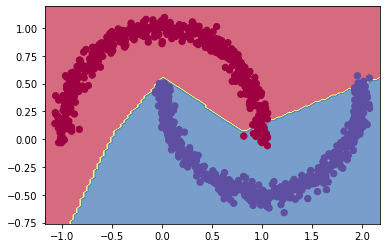

In [24]:
plot_decision_boundary(model2, x, y)

#### 4. Create a function (or write code) to visualize multiple image predictions for the fashion MNIST at the same time. Plot at least three different images and their prediciton labels at the same time. Hint: see the [classifcation tutorial in the TensorFlow documentation](https://www.tensorflow.org/tutorials/keras/classification) for ideas.

In [25]:
from tensorflow.keras.datasets import fashion_mnist

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [26]:
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [27]:
# Names defined here https://github.com/zalandoresearch/fashion-mnist
label_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

  Visualizing data

(-0.5, 27.5, 27.5, -0.5)

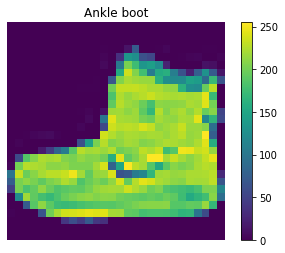

In [28]:
plt.imshow(train_data[0])
plt.colorbar()
plt.title(label_names[train_labels[0]])
plt.axis(False)

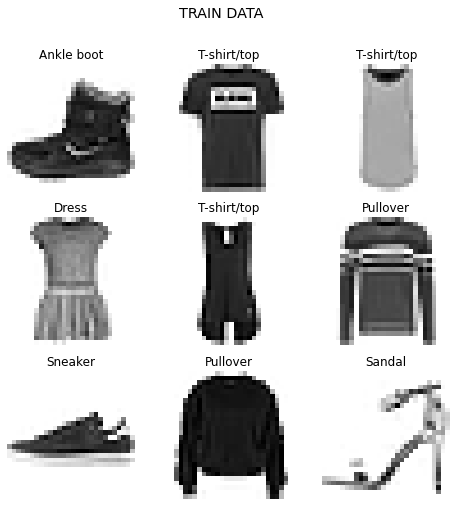

In [29]:
fig = plt.figure(figsize = (8,8))
fig.suptitle('TRAIN DATA', fontsize = 'x-large')
for i in range (9):
  plt.subplot(3,3,i+1)
  plt.axis(False)
  plt.imshow(train_data[i], cmap=plt.cm.binary) # plt.cm.binary changes to B&W
  plt.title(label_names[train_labels[i]])
plt.show()

Predictions (Starting with a simple model)

In [30]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape = (28,28)), # transform array shape (28,28) to (28*28 = 784)
  tf.keras.layers.Dense(4, activation = "relu"),
  tf.keras.layers.Dense(4, activation = "relu"),
  tf.keras.layers.Dense(10, activation = "softmax") # not sigmoid anymore
])


# SparseCategoricalCrossentropy() for integer labels
# CategoricalCrossentropy() for one hot encoded labels ([0, 1, 0, 1, 1, ...])
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ["accuracy"])

model.fit (train_data, 
           train_labels, 
           epochs = 10, 
           validation_data = (test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.1671 - accuracy: 0.1606 - val_loss: 1.7959 - val_accuracy: 0.2046
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7066 - accuracy: 0.2509 - val_loss: 1.6567 - val_accuracy: 0.2805
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6321 - accuracy: 0.2806 - val_loss: 1.6094 - val_accuracy: 0.2857
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6052 - accuracy: 0.2833 - val_loss: 1.6041 - val_accuracy: 0.2859
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5975 - accuracy: 0.2862 - val_loss: 1.6064 - val_accuracy: 0.2756
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5950 - accuracy: 0.2920 - val_loss: 1.5747 - val_accuracy: 0.2994
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5775 - accuracy: 0.3040 - val_loss: 1.6030 - val_accuracy:

In [31]:
# Ploting predictions 
y_preds = model.predict(test_data)

y_preds[0], y_preds[0].argmax(), label_names[y_preds[0].argmax()]

(array([7.9278105e-11, 0.0000000e+00, 0.0000000e+00, 2.4451529e-18,
        0.0000000e+00, 2.3362195e-02, 6.7842422e-21, 6.4880723e-01,
        4.4508079e-07, 3.2783014e-01], dtype=float32), 7, 'Sneaker')

In [32]:
# Create a function for plotting first 9 images along with its prediction
def plot_preds_image(model, images, true_labels, classes):
  fig = plt.figure(figsize = (10,10))
  fig.suptitle('PREDICTIONS')

  for i in range (9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])

    # Create predictions and targets
    target_image = images[i]
    pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
    pred_label = classes[pred_probs.argmax()]
    true_label = classes[true_labels[i]]

    # Plot the target image
    plt.imshow(target_image, cmap=plt.cm.binary)

    # Change the color of the titles depending on if the prediction is right or wrong
    if pred_label == true_label:
      color = "green"
    else:
      color = "red"

    # Add xlabel information (prediction/true label)
    plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                    100*tf.reduce_max(pred_probs),
                                                    true_label),
              color=color) # set the color to green or red

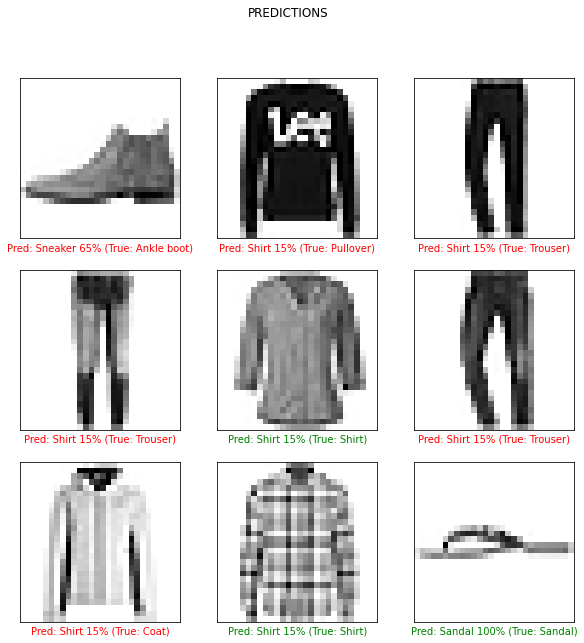

In [33]:
plot_preds_image(model, test_data, test_labels, label_names)

#### 5. Recreate [TensorFlow's](https://www.tensorflow.org/api_docs/python/tf/keras/activations/softmax) [softmax activation function](https://en.wikipedia.org/wiki/Softmax_function) in your own code. Make sure it can accept a tensor and return that tensor after having the softmax function applied to it.

In [34]:
def softmax(in_tensor):
  in_tensor_cast = tf.cast(in_tensor, tf.float32)
  return tf.math.exp(in_tensor_cast) / tf.math.reduce_sum(tf.math.exp(in_tensor_cast), axis = 0)

In [38]:
test = tf.constant([1,2,3])
print(softmax(test))

tf.Tensor([0.09003057 0.24472848 0.66524094], shape=(3,), dtype=float32)


In [36]:
tf.random.set_seed(42)

model_ex5 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape = (28,28)), # transform array shape (28,28) to (28*28 = 784)
  tf.keras.layers.Dense(4, activation = "relu"),
  tf.keras.layers.Dense(4, activation = "relu"),
  tf.keras.layers.Dense(10, activation = softmax) # using my own function softmax()
])


# SparseCategoricalCrossentropy() for integer labels
# CategoricalCrossentropy() for one hot encoded labels ([0, 1, 0, 1, 1, ...])
model_ex5.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ["accuracy"])

model_ex5.fit (train_data, 
           train_labels, 
           epochs = 10, 
           validation_data = (test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: nan - accuracy: 0.1000 - val_loss: nan - val_accuracy: 0.1000
Epoch 8/10
1875/1875 [============

#### 6. Train a model to get 88%+ accuracy on the fashion MNIST test set. Plot a confusion matrix to see the results after.

In [46]:
# Normalize data (value between 0 and 1, because pixels go from 0 to 255)
train_data_norm = train_data / 255.0 
test_data_norm = test_data / 255.0

In [48]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape = (28,28)), 
  tf.keras.layers.Dense(128, activation = "relu"), # Adding more neurons
  #tf.keras.layers.Dense(10, activation = "relu"),
  tf.keras.layers.Dense(10, activation = "softmax") 
])


# SparseCategoricalCrossentropy() for integer labels
# CategoricalCrossentropy() for one hot encoded labels ([0, 1, 0, 1, 1, ...])
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ["accuracy"])

model.fit (train_data_norm, 
           train_labels, 
           epochs = 10, 
           validation_data = (test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4952 - accuracy: 0.8260 - val_loss: 0.4183 - val_accuracy: 0.8487
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3740 - accuracy: 0.8651 - val_loss: 0.4622 - val_accuracy: 0.8434
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3363 - accuracy: 0.8770 - val_loss: 0.3823 - val_accuracy: 0.8589
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3108 - accuracy: 0.8872 - val_loss: 0.3698 - val_accuracy: 0.8649
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2929 - accuracy: 0.8913 - val_loss: 0.3627 - val_accuracy: 0.8684
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2785 - accuracy: 0.8965 - val_loss: 0.3718 - val_accuracy: 0.8606
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2671 - accuracy: 0.9004 - val_loss: 0.3504 - val_accuracy:

In [61]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(15, 15), text_size=10): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

In [62]:
y_probs = model.predict(test_data)
y_preds = y_probs.argmax(axis = 1)

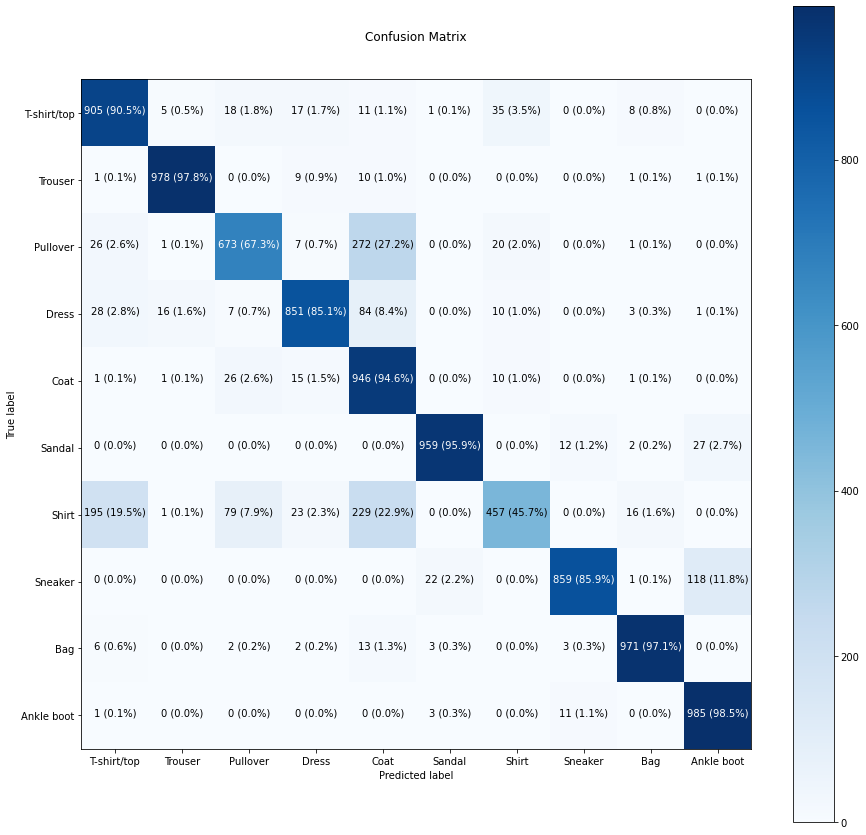

In [63]:
make_confusion_matrix(test_labels,
                      y_preds, 
                      label_names)

#### 7. Make a function to show an image of a certain class of the fashion MNIST dataset and make a prediction on it. For example, plot 3 images of the `T-shirt` class with their predictions.


In [64]:
label_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [67]:
test_data[0].shape

(28, 28)

In [78]:
x = np.where(test_labels == 0)
x[0][1]

27

In [91]:
"""
test_data = test_data
true_labels = test_labels
classes = label_names
class_name = desired class (one of the strings on 'classes')
"""

def plot_preds_image_by_class(model, test_data, true_labels, classes, class_name = "T-shirt/top"):
  class_idx = classes.index(class_name)
  img_indexes = np.where(true_labels == class_idx)
  fig = plt.figure(figsize = (20,10))

  for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.xticks([])
    plt.yticks([])

    target_image = test_data[img_indexes[0][i]]
    pred_probs = model.predict(target_image.reshape(1, 28, 28))
    pred_label = classes[pred_probs.argmax()]
    true_label = classes[true_labels[img_indexes[0][i]]]

    plt.imshow(target_image, cmap=plt.cm.binary)

    if pred_label == true_label:
      color = "green"
    else:
      color = "red"

    # Add xlabel information (prediction/true label)
    plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                    100*tf.reduce_max(pred_probs),
                                                    true_label),
              color=color) # set the color to green or red

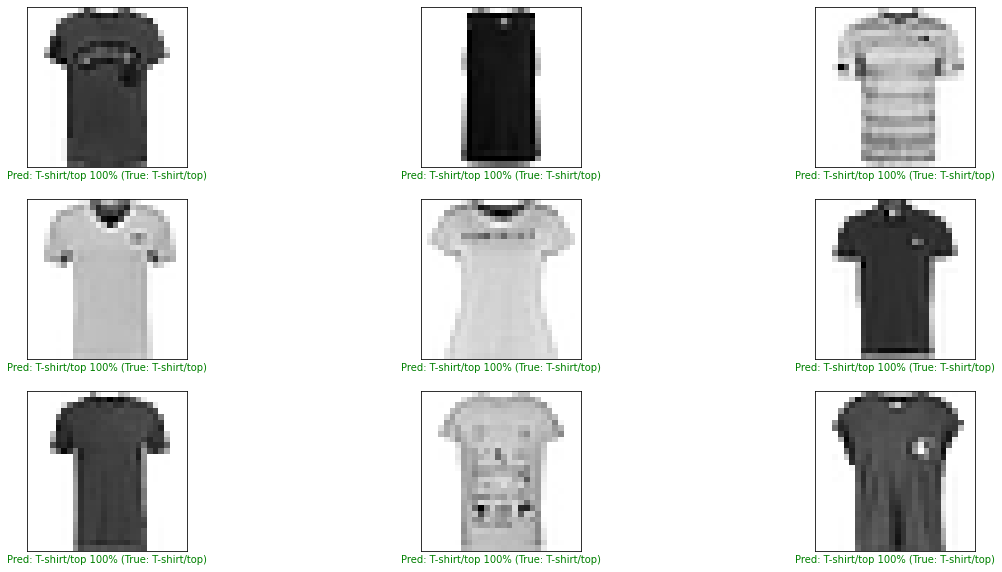

In [92]:
plot_preds_image_by_class(model, test_data, test_labels, label_names)